In [7]:
import pandas as pd
df=pd.read_csv('/insurance_data.csv')
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


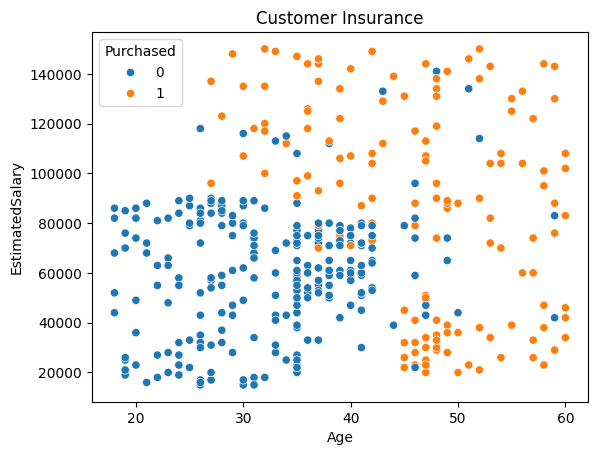

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(data=df,x='Age',y='EstimatedSalary',hue='Purchased')
plt.title('Customer Insurance')
plt.show()

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df[['Age', 'EstimatedSalary']]
y = df['Purchased']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y)


In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

models = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\n{name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))



Logistic Regression
Accuracy: 0.8375
Precision: 0.8636363636363636
Recall: 0.6551724137931034
F1 Score: 0.7450980392156863

KNN
Accuracy: 0.9
Precision: 0.8620689655172413
Recall: 0.8620689655172413
F1 Score: 0.8620689655172413

SVM
Accuracy: 0.9
Precision: 0.8387096774193549
Recall: 0.896551724137931
F1 Score: 0.8666666666666667

Decision Tree
Accuracy: 0.8625
Precision: 0.7647058823529411
Recall: 0.896551724137931
F1 Score: 0.8253968253968254

Random Forest
Accuracy: 0.9
Precision: 0.8387096774193549
Recall: 0.896551724137931
F1 Score: 0.8666666666666667


In [17]:

model = RandomForestClassifier()
model.fit(X_train, y_train)

mean_salary = df['EstimatedSalary'].mean()

test_cases = [
    [30, 87000],
    [40, mean_salary],
    [40, 100000],
    [50, mean_salary],
    [18, mean_salary],
    [22, 600000],
    [35, 2500000],
    [60, 100000000]
]

test_scaled = scaler.transform(test_cases)
predictions = model.predict(test_scaled)

for i, pred in enumerate(predictions):
    print(f"Test Case {i+1}: {'Will Purchase' if pred == 1 else 'Will Not Purchase'}")


Test Case 1: Will Not Purchase
Test Case 2: Will Not Purchase
Test Case 3: Will Purchase
Test Case 4: Will Not Purchase
Test Case 5: Will Not Purchase
Test Case 6: Will Purchase
Test Case 7: Will Purchase
Test Case 8: Will Purchase


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
